In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [6]:
print("Розмір тренувальної вибірки:", train_images.shape)
print("Розмір тестової вибірки:", test_images.shape)

Розмір тренувальної вибірки: (60000, 28, 28)
Розмір тестової вибірки: (10000, 28, 28)


In [8]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

In [9]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images.reshape(-1,28,28,1), train_labels, epochs=10,
                    validation_data=(test_images.reshape(-1,28,28,1), test_labels))

Epoch 1/10
1875/1875 [==============================] - 226s 120ms/step - loss: 0.5124 - accuracy: 0.8275 - val_loss: 0.3889 - val_accuracy: 0.8610
Epoch 2/10
1875/1875 [==============================] - 218s 116ms/step - loss: 0.3372 - accuracy: 0.8787 - val_loss: 0.3328 - val_accuracy: 0.8801
Epoch 3/10
1875/1875 [==============================] - 177s 94ms/step - loss: 0.2994 - accuracy: 0.8907 - val_loss: 0.3278 - val_accuracy: 0.8828
Epoch 4/10
1875/1875 [==============================] - 226s 121ms/step - loss: 0.2749 - accuracy: 0.8988 - val_loss: 0.3133 - val_accuracy: 0.8891
Epoch 5/10
1875/1875 [==============================] - 204s 109ms/step - loss: 0.2575 - accuracy: 0.9057 - val_loss: 0.3024 - val_accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 183s 98ms/step - loss: 0.2400 - accuracy: 0.9106 - val_loss: 0.3084 - val_accuracy: 0.8907
Epoch 7/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.2279 - accuracy: 0.9151 - val_los

In [13]:
model.save('fashion_mnist_model.h5')

In [14]:
test_loss, test_acc = model.evaluate(test_images.reshape(-1,28,28,1),  test_labels, verbose=2)

print('\\nТочність на тестових даних:', test_acc)

313/313 - 6s - loss: 0.3319 - accuracy: 0.8920 - 6s/epoch - 19ms/step
\nТочність на тестових даних: 0.8920000195503235


313/313 [==============================] - 5s 14ms/step


NameError: name 'class_names' is not defined

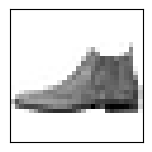

In [15]:
predictions = model.predict(test_images.reshape(-1,28,28,1))

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label],
                                  class_names[true_label]),color=color)
plt.show()
